# Financial Fraud Detection and Transaction Analysis System

In [1]:
#Loading the dataset

In [2]:
import pandas as pd
data = pd.read_csv('creditcard.csv')
print(data.head())
print(data.info())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [3]:
#class Distribution 

In [4]:
print(data['Class'].value_counts())

0    284315
1       492
Name: Class, dtype: int64


In [5]:
# Correlation matrix

In [6]:
correlation_matrix = data.corr()
print(correlation_matrix)

            Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  4.188326e-16 -1.164018e-15 -9.082889e-16   
V2     -0.010593  4.188326e-16  1.000000e+00  3.140164e-16 -1.125909e-15   
V3     -0.419618 -1.164018e-15  3.140164e-16  1.000000e+00  4.644369e-16   
V4     -0.105260 -9.082889e-16 -1.125909e-15  4.644369e-16  1.000000e+00   
V5      0.173072  2.085924e-17  5.230686e-16 -5.483554e-17 -1.722056e-15   
V6     -0.063016 -6.343731e-16  2.781752e-16  1.627805e-15 -7.565957e-16   
V7      0.084714 -1.018099e-15  1.857398e-16  5.239200e-16 -4.188169e-16   
V8     -0.036949 -2.557889e-16 -5.698764e-17 -1.297365e-15  5.645256e-16   
V9     -0.008660 -1.347621e-16  2.006267e-17  5.725902e-16  6.873528e-16   
V10     0.030617  7.340779e-17 -3.930237e-16  1.157736e-15  2.203905e-16   
V11    -0.247689  2.248163e-16  1.965104e-16  1.603095e-15  3.498520e-16   
V12     0.12

In [7]:
# Plot transaction amounts for both fraud and non-fraud cases

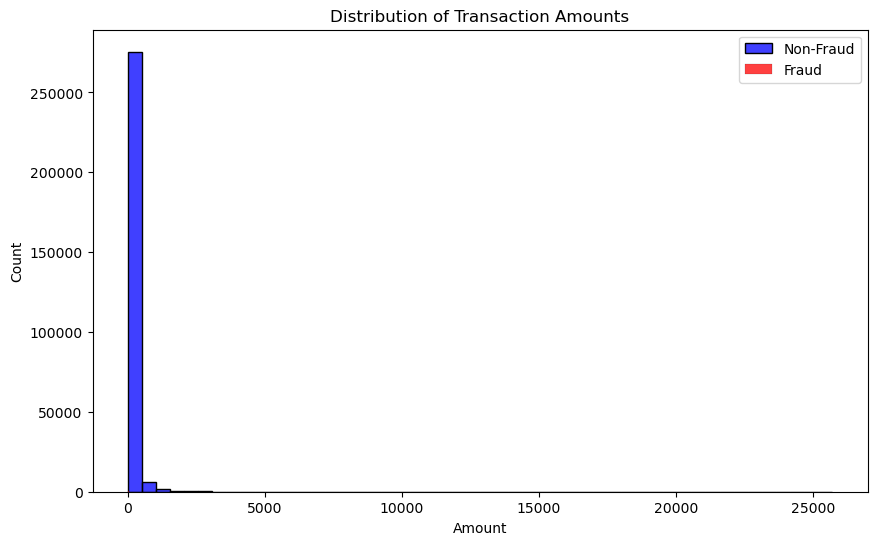

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(data[data['Class'] == 0]['Amount'], bins=50, color='blue', label='Non-Fraud')
sns.histplot(data[data['Class'] == 1]['Amount'], bins=50, color='red', label='Fraud')
plt.legend()
plt.title('Distribution of Transaction Amounts')
plt.show()

In [9]:
#Data Preprocessing 

In [10]:
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [11]:
from sklearn.preprocessing import StandardScaler
data['ScaledAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data['ScaledTime'] = StandardScaler().fit_transform(data['Time'].values.reshape(-1, 1))
data = data.drop(columns=['Amount', 'Time'])

In [12]:
X = data.drop(columns=['Class'])
y = data['Class']

In [13]:
#Splitting the dataset into training and testing sets for model evaluation.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
#Model Building 

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9991222218320986
Confusion Matrix:
 [[56855     9]
 [   41    57]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [18]:
#Here’s the result from model evaluation:
#Accuracy: 99.91%
#Confusion Matrix:
#True Negatives (non-fraudulent transactions classified correctly): 56,855
#False Positives (non-fraudulent transactions classified as fraudulent): 9
#False Negatives (fraudulent transactions classified as non-fraudulent): 41
#True Positives (fraudulent transactions classified correctly): 57
#Classification Report:
#Precision for Fraud: 0.86
#Recall for Fraud: 0.58
#F1-Score for Fraud: 0.70

# Steps to Implement Real-Time Detection and Alerts

In [19]:
#Saving the Trained Model

In [ ]:
import joblib
joblib.dump(rf_model, 'fraud_detection_model.pkl')

In [20]:
#Simulating Real-Time Data

In [ ]:
import pandas as pd
import joblib
rf_model = joblib.load('fraud_detection_model.pkl')
def simulate_transaction_stream(transactions_df):
    for index, transaction in transactions_df.iterrows():
        transaction_data = transaction.values.reshape(1, -1)
        prediction = rf_model.predict(transaction_data)
        if prediction == 1:
            print(f"ALERT: Fraudulent transaction detected at index {index}")
incoming_transactions = X_test.sample(10)
simulate_transaction_stream(incoming_transactions)

In [21]:
#AWS SNS Integration
#Using the AWS SDK (boto3) to trigger alerts via SNS

In [ ]:
import boto3
sns_client = boto3.client('sns', region_name='us-west-2')
def send_sns_alert(message):
    sns_client.publish(
        TopicArn='arn:aws:sns:us-west-2:123456789012:YourTopic',
        Message=message,
        Subject='Fraud Alert'
    )
def simulate_transaction_stream(transactions_df):
    for index, transaction in transactions_df.iterrows():
        transaction_data = transaction.values.reshape(1, -1)
        prediction = rf_model.predict(transaction_data)
    if prediction == 1:
            message = f"ALERT: Fraudulent transaction detected at index {index}"
            send_sns_alert(message)
            print(message)

In [ ]:
#Installed Twilio SDK
#Used the following code to send alerts

In [ ]:
from twilio.rest import Client
account_sid = 'your_account_sid'
auth_token = 'your_auth_token'
twilio_number = 'your_twilio_phone_number'
recipient_number = 'recipient_phone_number'
client = Client(account_sid, auth_token)
def send_twilio_alert(message):
    client.messages.create(
        body=message,
        from_=twilio_number,
        to=recipient_number
    )
def simulate_transaction_stream(transactions_df):
    for index, transaction in transactions_df.iterrows():
        transaction_data = transaction.values.reshape(1, -1)
        prediction = rf_model.predict(transaction_data)

        if prediction == 1:
            message = f"ALERT: Fraudulent transaction detected at index {index}"
            send_twilio_alert(message)
            print(message)